In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read saved csv files
TrainVal     = pd.read_csv('00TrainVal.csv',index_col=0,parse_dates=True)

# Urban Expressway

Stockton CA; Total length = ~10km

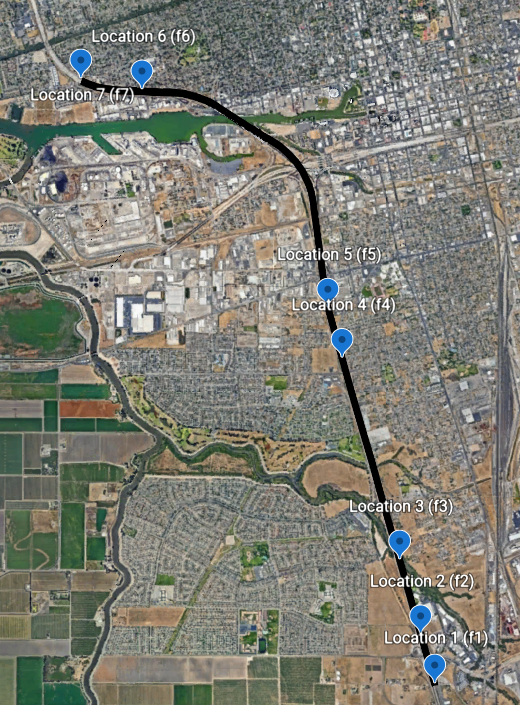

In [3]:
# Percentage of missing values
53 / len(TrainVal) * 100

0.1508424408014572

--------------------------------------------

# Building Dataset

--------------------------------------------

In [4]:
df = TrainVal['f1'][(TrainVal.index.month <= 5) & (TrainVal.index.dayofweek == 6)]

In [5]:
df = df.reset_index()
df.columns = ['Timestamp','value']

In [6]:
df

,Timestamp,value
0,2019-03-03 00:00:00,91.0
1,2019-03-03 00:05:00,112.0
2,2019-03-03 00:10:00,106.0
3,2019-03-03 00:15:00,85.0
4,2019-03-03 00:20:00,87.0
...,...,...
3739,2019-05-26 23:35:00,136.0
3740,2019-05-26 23:40:00,132.0
3741,2019-05-26 23:45:00,129.0
3742,2019-05-26 23:50:00,124.0


In [7]:
df.iloc[287]          # Just a quick check

Timestamp    2019-03-03 23:55:00
value                       80.0
Name: 287, dtype: object

In [8]:
# Generate index for pivot
x = list(range(1,289))
y = []
n = len(df['Timestamp'].dt.day.unique())
for i in range(n):
    y.extend(x)

In [9]:
len(y)

3744

In [10]:
df['index'] = y

In [11]:
df['columns'] = df['Timestamp'].dt.day

In [12]:
df

,Timestamp,value,index,columns
0,2019-03-03 00:00:00,91.0,1,3
1,2019-03-03 00:05:00,112.0,2,3
2,2019-03-03 00:10:00,106.0,3,3
3,2019-03-03 00:15:00,85.0,4,3
4,2019-03-03 00:20:00,87.0,5,3
...,...,...,...,...
3739,2019-05-26 23:35:00,136.0,284,26
3740,2019-05-26 23:40:00,132.0,285,26
3741,2019-05-26 23:45:00,129.0,286,26
3742,2019-05-26 23:50:00,124.0,287,26


In [13]:
df.index

RangeIndex(start=0, stop=3744, step=1)

In [14]:
df['Timestamp'].dt.day.unique()

array([ 3, 10, 17, 24, 31,  7, 14, 21, 28,  5, 12, 19, 26], dtype=int64)

In [15]:
df['Timestamp'].dt.day

0        3
1        3
2        3
3        3
4        3
        ..
3739    26
3740    26
3741    26
3742    26
3743    26
Name: Timestamp, Length: 3744, dtype: int64

In [16]:
len(df['Timestamp'].dt.time.unique())

288

In [17]:
df['Timestamp'].dt.time

0       00:00:00
1       00:05:00
2       00:10:00
3       00:15:00
4       00:20:00
          ...   
3739    23:35:00
3740    23:40:00
3741    23:45:00
3742    23:50:00
3743    23:55:00
Name: Timestamp, Length: 3744, dtype: object

In [18]:
df1 = pd.pivot(data=df, index='index', columns='columns', values='value')

In [19]:
df1.head(40)

columns,3,5,7,10,12,14,17,19,21,24,26,28,31
index,,,,,,,,,,,,,
1,91.0,115.0,121.0,106.0,129.0,83.0,112.0,126.0,113.0,136.0,121.0,145.0,119.0
2,112.0,130.0,118.0,114.0,135.0,135.0,119.0,87.0,113.0,130.0,107.0,101.0,138.0
3,106.0,97.0,102.0,94.0,117.0,102.0,108.0,110.0,132.0,104.0,112.0,125.0,95.0
4,85.0,109.0,128.0,88.0,124.0,124.0,117.0,117.0,116.0,105.0,118.0,108.0,117.0
5,87.0,113.0,80.0,96.0,115.0,117.0,91.0,89.0,107.0,84.0,102.0,102.0,130.0
6,66.0,88.0,108.0,104.0,98.0,78.0,85.0,93.0,106.0,104.0,93.0,107.0,102.0
7,54.0,97.0,98.0,78.0,93.0,111.0,76.0,77.0,90.0,86.0,99.0,105.0,108.0
8,67.0,92.0,93.0,78.0,93.0,93.0,91.0,89.0,99.0,84.0,87.0,111.0,75.0
9,86.0,81.0,74.0,66.0,82.0,85.0,85.0,82.0,100.0,85.0,84.0,106.0,77.0


In [20]:
fvalue = df1.mean(axis = 1)

In [21]:
fvalue.head(40)

index
1     116.692308
2     118.384615
3     108.000000
4     112.000000
5     101.000000
6      94.769231
7      90.153846
8      88.615385
9      84.076923
10     88.153846
11     78.538462
12     79.846154
13     73.538462
14     68.461538
15     66.923077
16     66.230769
17     67.230769
18     62.615385
19     66.538462
20     61.153846
21     52.000000
22     58.076923
23     51.846154
24     52.307692
25     52.666667
26     52.583333
27     50.916667
28     50.750000
29     46.166667
30     47.750000
31     46.916667
32     44.916667
33     45.916667
34     41.833333
35     44.500000
36     45.916667
37     45.076923
38     41.000000
39     41.307692
40     42.076923
dtype: float64

In [22]:
r, _ = np.where(df1.isna())

In [23]:
r = r.tolist()

In [24]:
r

[24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35]

In [25]:
r = [x+1 for x in r]

In [26]:
r

[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]

In [27]:
fvalue = fvalue.loc[r]

In [28]:
pd.concat([fvalue,fvalue],axis=1)

,0,1
index,,
25,52.666667,52.666667
26,52.583333,52.583333
27,50.916667,50.916667
28,50.750000,50.750000
29,46.166667,46.166667
30,47.750000,47.750000
31,46.916667,46.916667
32,44.916667,44.916667
33,45.916667,45.916667


In [29]:
pd.Series(fvalue.loc[r].values)

0     52.666667
1     52.583333
2     50.916667
3     50.750000
4     46.166667
5     47.750000
6     46.916667
7     44.916667
8     45.916667
9     41.833333
10    44.500000
11    45.916667
dtype: float64

In [30]:
df1.isnull()

columns,3,5,7,10,12,14,17,19,21,24,26,28,31
index,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,False,False,False,False,False,False,False,False,False,False,False,False,False
285,False,False,False,False,False,False,False,False,False,False,False,False,False
286,False,False,False,False,False,False,False,False,False,False,False,False,False


In [31]:
df1.isnull().sum()

columns
3      0
5      0
7      0
10    12
12     0
14     0
17     0
19     0
21     0
24     0
26     0
28     0
31     0
dtype: int64

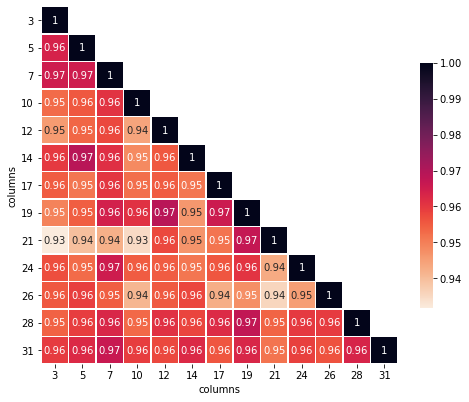

In [32]:
# The above as a plot

corr = df1.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool), 1)

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(8, 9))

# Draw the heatmap with the mask and correct aspect ratio
crr = sns.heatmap(corr, mask=mask, cmap="rocket_r",
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

crr.set_yticklabels(crr.get_yticklabels(), rotation=0);

# Mean Fill Technique

In [33]:
l = ['f1','f2','f3','f4','f5','f6','f7']

## Fill missing Sunday data

In [34]:
for i in range(7):
    df = TrainVal[l[i]][(TrainVal.index.month <= 5) & (TrainVal.index.dayofweek == 6)]
    df = df.reset_index()
    df.columns = ['Timestamp','value']
    df['index'] = y
    df['columns'] = df['Timestamp'].dt.day
    df1 = pd.pivot(data=df, index='index', columns='columns', values='value')
    
    r, _ = np.where(df1.isna())
    r = r.tolist()
    r = [x+1 for x in r]

    fvalue = df1.mean(axis = 1)
    fvalue = fvalue.loc[r]
    
    if i == 0:
        fill_Sun = fvalue
    else:
        fill_Sun = pd.concat([fill_Sun,fvalue],axis=1)

fill_Sun = fill_Sun.round(0)
fill_Sun.columns = l

In [35]:
fill_Sun

,f1,f2,f3,f4,f5,f6,f7
index,,,,,,,
25,53.0,55.0,56.0,66.0,57.0,40.0,40.0
26,53.0,55.0,56.0,67.0,59.0,36.0,37.0
27,51.0,52.0,58.0,66.0,56.0,38.0,41.0
28,51.0,52.0,55.0,66.0,55.0,33.0,35.0
29,46.0,48.0,54.0,63.0,51.0,35.0,37.0
30,48.0,50.0,57.0,62.0,57.0,33.0,35.0
31,47.0,48.0,48.0,58.0,48.0,30.0,35.0
32,45.0,46.0,50.0,60.0,48.0,28.0,33.0
33,46.0,49.0,52.0,61.0,51.0,29.0,33.0


## Fill missing Saturday data

In [36]:
for i in range(7):
    df = TrainVal[l[i]][(TrainVal.index.month <= 5) & (TrainVal.index.dayofweek == 5)]
    df = df.reset_index()
    df.columns = ['Timestamp','value']
    df['index'] = y
    df['columns'] = df['Timestamp'].dt.day
    df1 = pd.pivot(data=df, index='index', columns='columns', values='value')
    
    r, _ = np.where(df1.isna())
    r = r.tolist()
    r = [x+1 for x in r]

    fvalue = df1.mean(axis = 1)
    fvalue = fvalue.loc[r]
    
    if i == 0:
        fill_Sat = fvalue
    else:
        fill_Sat = pd.concat([fill_Sat,fvalue],axis=1)

fill_Sat = fill_Sat.round(0)
fill_Sat.columns = l

In [37]:
fill_Sat

,f1,f2,f3,f4,f5,f6,f7
index,,,,,,,
248,214.0,226.0,244.0,223.0,274.0,213.0,194.0
249,223.0,238.0,243.0,217.0,258.0,190.0,183.0
250,215.0,229.0,243.0,218.0,263.0,208.0,196.0
251,215.0,229.0,237.0,210.0,249.0,193.0,174.0
252,212.0,231.0,236.0,205.0,246.0,196.0,175.0
253,225.0,235.0,243.0,207.0,246.0,192.0,173.0
254,226.0,232.0,245.0,220.0,261.0,200.0,181.0
255,226.0,232.0,246.0,220.0,264.0,190.0,172.0
256,219.0,233.0,244.0,224.0,267.0,195.0,175.0


## Raplace Missing values and Metrics

In [38]:
TrainVal

,f1,f2,f3,f4,f5,f6,f7
2019-03-01 00:00:00,104.0,98.0,132.0,125.0,128.0,38.0,45.0
2019-03-01 00:05:00,100.0,95.0,135.0,125.0,119.0,72.0,77.0
2019-03-01 00:10:00,110.0,124.0,132.0,112.0,118.0,73.0,73.0
2019-03-01 00:15:00,110.0,102.0,103.0,100.0,106.0,88.0,90.0
2019-03-01 00:20:00,101.0,98.0,117.0,114.0,109.0,66.0,62.0
...,...,...,...,...,...,...,...
2019-06-30 23:35:00,141.0,143.0,150.0,142.0,153.0,110.0,84.0
2019-06-30 23:40:00,132.0,128.0,139.0,116.0,114.0,98.0,89.0
2019-06-30 23:45:00,106.0,111.0,123.0,127.0,146.0,94.0,85.0
2019-06-30 23:50:00,137.0,140.0,141.0,103.0,124.0,109.0,95.0


In [39]:
r, _ = np.where(TrainVal.isna())
np.unique(r)

array([ 2616,  2617,  2618,  2619,  2620,  2621,  2622,  2623,  2624,
        2625,  2626,  2627, 22711, 22712, 22713, 22714, 22715, 22716,
       22717, 22718, 22719, 22720, 22721, 22722, 22723, 22724, 22725,
       22726, 22727, 22728, 22729, 22730, 22731, 22732, 22733, 22734,
       22735, 22736, 22737, 22738, 22739, 22740, 22741, 22742, 22743,
       22744, 22745, 22746, 22747, 22748, 22749, 22750, 22751],
      dtype=int64)

In [40]:
r = np.unique(r).tolist()       # Select Only unique values
sun = r[0:12]                   # Index location for missing Sunday data
sat = r[12:]                    # Index location for missing Saturday data

In [41]:
len(sat)+len(sun)               # Confirm that it matches the number of NaN values == 53 for this dataset

53

In [42]:
## Set Index to correlate with Original Dataset
fill_Sun['sun'] = sun
fill_Sun = fill_Sun.set_index('sun')

In [43]:
fill_Sat['sat'] = sat
fill_Sat = fill_Sat.set_index('sat')

In [44]:
fill_Sun

,f1,f2,f3,f4,f5,f6,f7
sun,,,,,,,
2616,53.0,55.0,56.0,66.0,57.0,40.0,40.0
2617,53.0,55.0,56.0,67.0,59.0,36.0,37.0
2618,51.0,52.0,58.0,66.0,56.0,38.0,41.0
2619,51.0,52.0,55.0,66.0,55.0,33.0,35.0
2620,46.0,48.0,54.0,63.0,51.0,35.0,37.0
2621,48.0,50.0,57.0,62.0,57.0,33.0,35.0
2622,47.0,48.0,48.0,58.0,48.0,30.0,35.0
2623,45.0,46.0,50.0,60.0,48.0,28.0,33.0
2624,46.0,49.0,52.0,61.0,51.0,29.0,33.0


In [45]:
fill_Sat

,f1,f2,f3,f4,f5,f6,f7
sat,,,,,,,
22711,214.0,226.0,244.0,223.0,274.0,213.0,194.0
22712,223.0,238.0,243.0,217.0,258.0,190.0,183.0
22713,215.0,229.0,243.0,218.0,263.0,208.0,196.0
22714,215.0,229.0,237.0,210.0,249.0,193.0,174.0
22715,212.0,231.0,236.0,205.0,246.0,196.0,175.0
22716,225.0,235.0,243.0,207.0,246.0,192.0,173.0
22717,226.0,232.0,245.0,220.0,261.0,200.0,181.0
22718,226.0,232.0,246.0,220.0,264.0,190.0,172.0
22719,219.0,233.0,244.0,224.0,267.0,195.0,175.0


In [46]:
df_fill = TrainVal.reset_index()

In [47]:
df_fill.update(fill_Sun)
df_fill.update(fill_Sat)

In [48]:
TrainVal[2615:2629]

,f1,f2,f3,f4,f5,f6,f7
2019-03-10 01:55:00,56.0,63.0,63.0,65.0,56.0,32.0,28.0
2019-03-10 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:20:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:25:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-10 02:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [49]:
df_fill[2615:2629]

,index,f1,f2,f3,f4,f5,f6,f7
2615,2019-03-10 01:55:00,56.0,63.0,63.0,65.0,56.0,32.0,28.0
2616,2019-03-10 02:00:00,53.0,55.0,56.0,66.0,57.0,40.0,40.0
2617,2019-03-10 02:05:00,53.0,55.0,56.0,67.0,59.0,36.0,37.0
2618,2019-03-10 02:10:00,51.0,52.0,58.0,66.0,56.0,38.0,41.0
2619,2019-03-10 02:15:00,51.0,52.0,55.0,66.0,55.0,33.0,35.0
2620,2019-03-10 02:20:00,46.0,48.0,54.0,63.0,51.0,35.0,37.0
2621,2019-03-10 02:25:00,48.0,50.0,57.0,62.0,57.0,33.0,35.0
2622,2019-03-10 02:30:00,47.0,48.0,48.0,58.0,48.0,30.0,35.0
2623,2019-03-10 02:35:00,45.0,46.0,50.0,60.0,48.0,28.0,33.0
2624,2019-03-10 02:40:00,46.0,49.0,52.0,61.0,51.0,29.0,33.0


In [50]:
TrainVal[22710:22753]

,f1,f2,f3,f4,f5,f6,f7
2019-05-18 20:30:00,154.0,151.0,188.0,169.0,186.0,139.0,92.0
2019-05-18 20:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 20:40:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 20:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 20:50:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 20:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 21:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 21:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 21:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-05-18 21:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [51]:
df_fill[22710:22753]

,index,f1,f2,f3,f4,f5,f6,f7
22710,2019-05-18 20:30:00,154.0,151.0,188.0,169.0,186.0,139.0,92.0
22711,2019-05-18 20:35:00,214.0,226.0,244.0,223.0,274.0,213.0,194.0
22712,2019-05-18 20:40:00,223.0,238.0,243.0,217.0,258.0,190.0,183.0
22713,2019-05-18 20:45:00,215.0,229.0,243.0,218.0,263.0,208.0,196.0
22714,2019-05-18 20:50:00,215.0,229.0,237.0,210.0,249.0,193.0,174.0
22715,2019-05-18 20:55:00,212.0,231.0,236.0,205.0,246.0,196.0,175.0
22716,2019-05-18 21:00:00,225.0,235.0,243.0,207.0,246.0,192.0,173.0
22717,2019-05-18 21:05:00,226.0,232.0,245.0,220.0,261.0,200.0,181.0
22718,2019-05-18 21:10:00,226.0,232.0,246.0,220.0,264.0,190.0,172.0
22719,2019-05-18 21:15:00,219.0,233.0,244.0,224.0,267.0,195.0,175.0


In [52]:
df_fill.isnull().any()

index    False
f1       False
f2       False
f3       False
f4       False
f5       False
f6       False
f7       False
dtype: bool

In [53]:
print(len(df_fill)) == print(len(TrainVal))

35136
35136


True

# Evaluation

In [54]:
for i in range(1,8):
    print('Original variable variance f{}: '.format(str(i)), 
          TrainVal['f{}'.format(str(i))].var())
    print('Variance after mean imputation: ', df_fill['f{}'.format(str(i))].var())

Original variable variance f1:  10704.476821663486
Variance after mean imputation:  10699.514473823678
Original variable variance f2:  12441.148108721785
Variance after mean imputation:  12435.124459157554
Original variable variance f3:  14373.567336956285
Variance after mean imputation:  14366.947485032093
Original variable variance f4:  9234.359726050438
Variance after mean imputation:  9230.362317815185
Original variable variance f5:  17553.38816276796
Variance after mean imputation:  17546.037318739753
Original variable variance f6:  13423.37557735887
Variance after mean imputation:  13416.69532510869
Original variable variance f7:  9737.093974390798
Variance after mean imputation:  9731.931155210495


In [55]:
x1 = []      # Orignal Variance
x2 = []      # Variance with mean fill

for i in range(1,8):
    x1.append(TrainVal['f{}'.format(str(i))].var())
    x2.append(df_fill['f{}'.format(str(i))].var())

In [56]:
d = {'Original Variance': x1, 'Fill Variance': x2}
d = pd.DataFrame(data=d)

In [57]:
d['location'] = l
d.set_index('location')

,Original Variance,Fill Variance
location,,
f1,10704.476822,10699.514474
f2,12441.148109,12435.124459
f3,14373.567337,14366.947485
f4,9234.359726,9230.362318
f5,17553.388163,17546.037319
f6,13423.375577,13416.695325
f7,9737.093974,9731.931155


# Check for Outliers in New Dataset

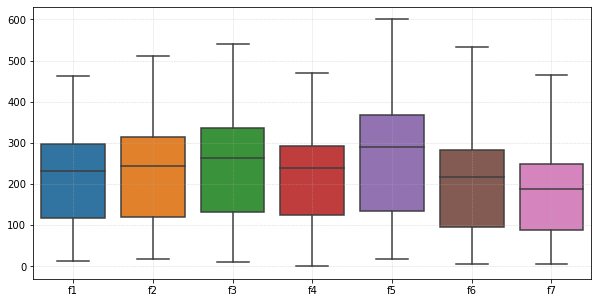

In [58]:
f, ax = plt.subplots(figsize=(10, 5))

ax = sns.boxplot(data=df_fill)

ax.grid(linestyle='--', linewidth=0.5, alpha =0.5)

# Save Dataset

In [59]:
TrainVal = df_fill.set_index('index')

In [60]:
TrainVal

,f1,f2,f3,f4,f5,f6,f7
index,,,,,,,
2019-03-01 00:00:00,104.0,98.0,132.0,125.0,128.0,38.0,45.0
2019-03-01 00:05:00,100.0,95.0,135.0,125.0,119.0,72.0,77.0
2019-03-01 00:10:00,110.0,124.0,132.0,112.0,118.0,73.0,73.0
2019-03-01 00:15:00,110.0,102.0,103.0,100.0,106.0,88.0,90.0
2019-03-01 00:20:00,101.0,98.0,117.0,114.0,109.0,66.0,62.0
...,...,...,...,...,...,...,...
2019-06-30 23:35:00,141.0,143.0,150.0,142.0,153.0,110.0,84.0
2019-06-30 23:40:00,132.0,128.0,139.0,116.0,114.0,98.0,89.0
2019-06-30 23:45:00,106.0,111.0,123.0,127.0,146.0,94.0,85.0


In [61]:
TrainVal.isnull().sum().sum()

0

In [62]:
TrainVal.to_csv('01TrainVal.csv')